In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import struct
import os
from sklearn.model_selection import train_test_split

# 1. Load ECG Training Data

In [104]:
zip_data_path = "../data/X_train.zip"

In [106]:
import zipfile
import struct
import numpy as np

def read_zip_binary(zip_path):
    ragged_array = []
    with zipfile.ZipFile(zip_path, 'r') as zf:
        # Extract base filename (e.g., X_train.bin inside X_train.zip)
        inner_path = zip_path.split("/")[-1].split(".")[0] + ".bin"
        with zf.open(inner_path, 'r') as r:
            while True:
                size_bytes = r.read(4)
                if not size_bytes:
                    break
                sub_array_size = struct.unpack('i', size_bytes)[0]
                sub_array = list(struct.unpack(f'{sub_array_size}h', r.read(sub_array_size * 2)))
                ragged_array.append(sub_array)
    return ragged_array

ecg_signals = read_zip_binary(zip_data_path)


# 2. Load Training Labels

In [108]:
import pandas as pd
import numpy as np

# Replace with actual path to labels
labels_path = "../data/y_train.csv"

if os.path.exists(labels_path):
    labels_df = pd.read_csv(labels_path, header=None, names=["label"])
    labels_df

In [109]:
labels_df

,label
0,2
1,2
2,2
3,0
4,0
...,...
6174,0
6175,0
6176,0
6177,2


 # 3. Class Distribution

label
0    3638
1     549
2    1765
3     227
Name: count, dtype: int64


<Axes: title={'center': 'Class Distribution'}, xlabel='Class', ylabel='Count'>

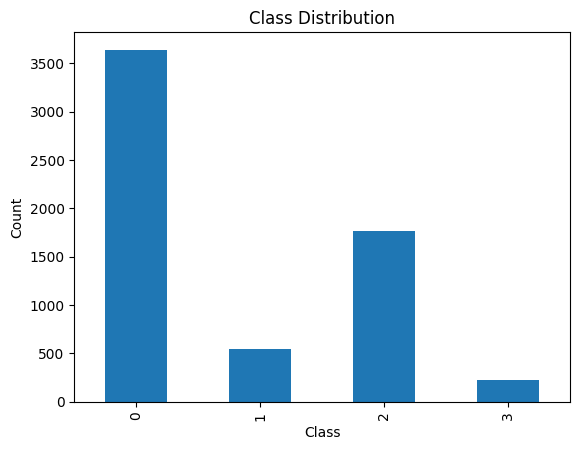

In [111]:
label_counts = labels_df["label"].value_counts().sort_index()
print(label_counts)

label_counts.plot(kind="bar", title="Class Distribution", xlabel="Class", ylabel="Count")


# 4. Signal Length Distribution

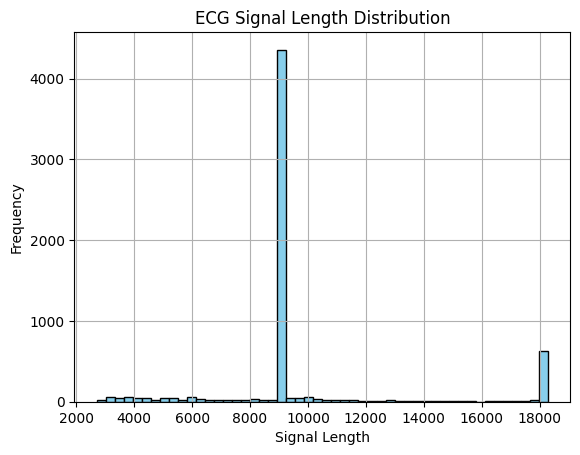

In [116]:
import matplotlib.pyplot as plt

signal_lengths = [len(signal) for signal in ecg_signals]

plt.hist(signal_lengths, bins=50, color="skyblue", edgecolor="black")
plt.title("ECG Signal Length Distribution")
plt.xlabel("Signal Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# 5. Summary Statistics by Class

In [118]:
class_stats = []

for class_id in sorted(labels_df["label"].unique()):
    signals = [ecg_signals[i] for i in labels_df[labels_df["label"] == class_id].index]
    flattened = [value for signal in signals for value in signal]
    class_stats.append({
        "class": class_id,
        "mean": np.mean(flattened),
        "std": np.std(flattened),
        "min": np.min(flattened),
        "max": np.max(flattened)
    })

pd.DataFrame(class_stats)


,class,mean,std,min,max
0,0,7.776893,228.917823,-10636,8318
1,1,8.054836,201.118132,-6323,6342
2,2,6.634972,234.002699,-7360,8257
3,3,5.312113,502.393673,-7030,7440


# 6. Plot Example Signal per Class

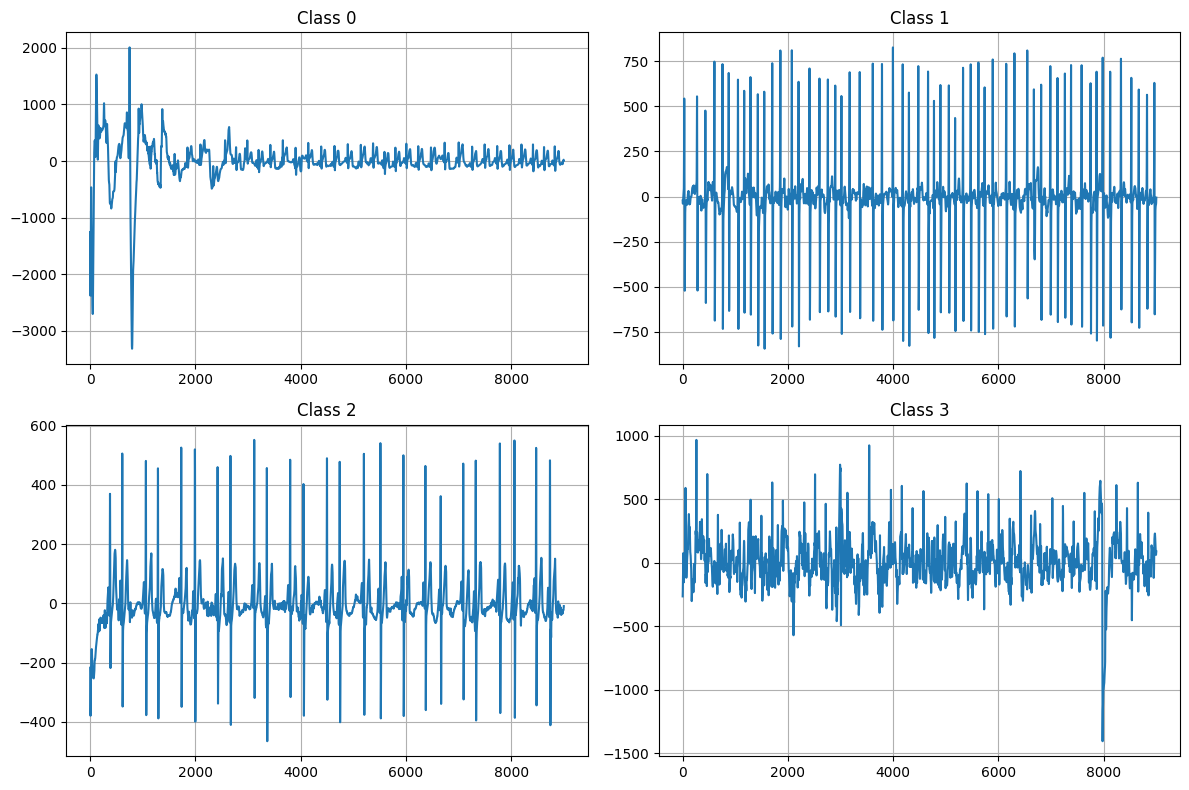

In [122]:
plt.figure(figsize=(12, 8))
for class_id in range(4):
    index = labels_df[labels_df["label"] == class_id].index[0]
    plt.subplot(2, 2, class_id+1)
    plt.plot(ecg_signals[index])
    plt.title(f"Class {class_id}")
    plt.grid(True)
plt.tight_layout()
plt.show()


# 7. Create Stratified Train/Validation Split

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    ecg_signals, labels_df["label"],
    test_size=0.2,
    stratify=labels_df["label"],
    random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")


Training samples: 4943
Validation samples: 1236
